Contaminated_data.shape: (10000, 4000)
Clean_data.shape: (10000, 4000)


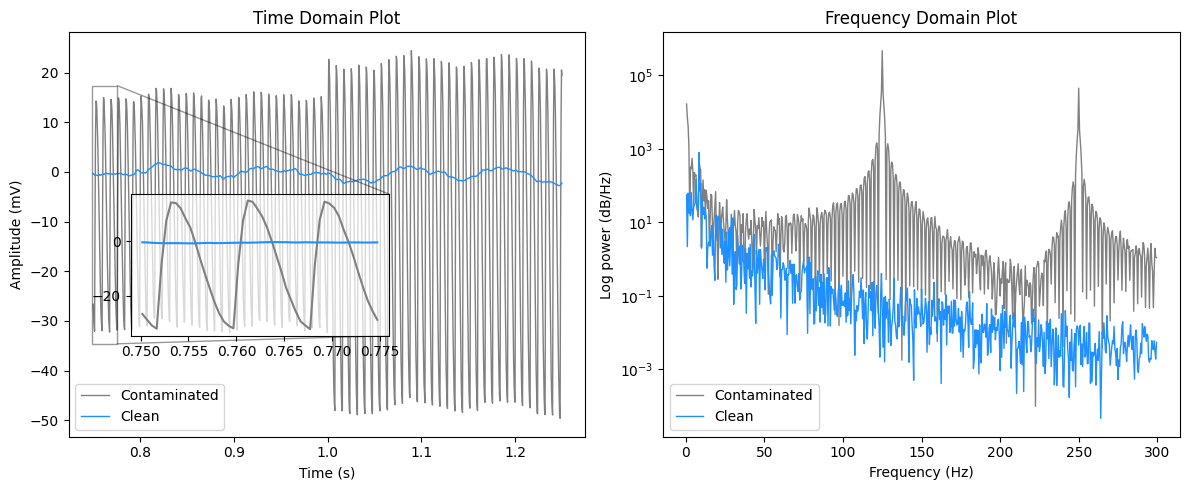

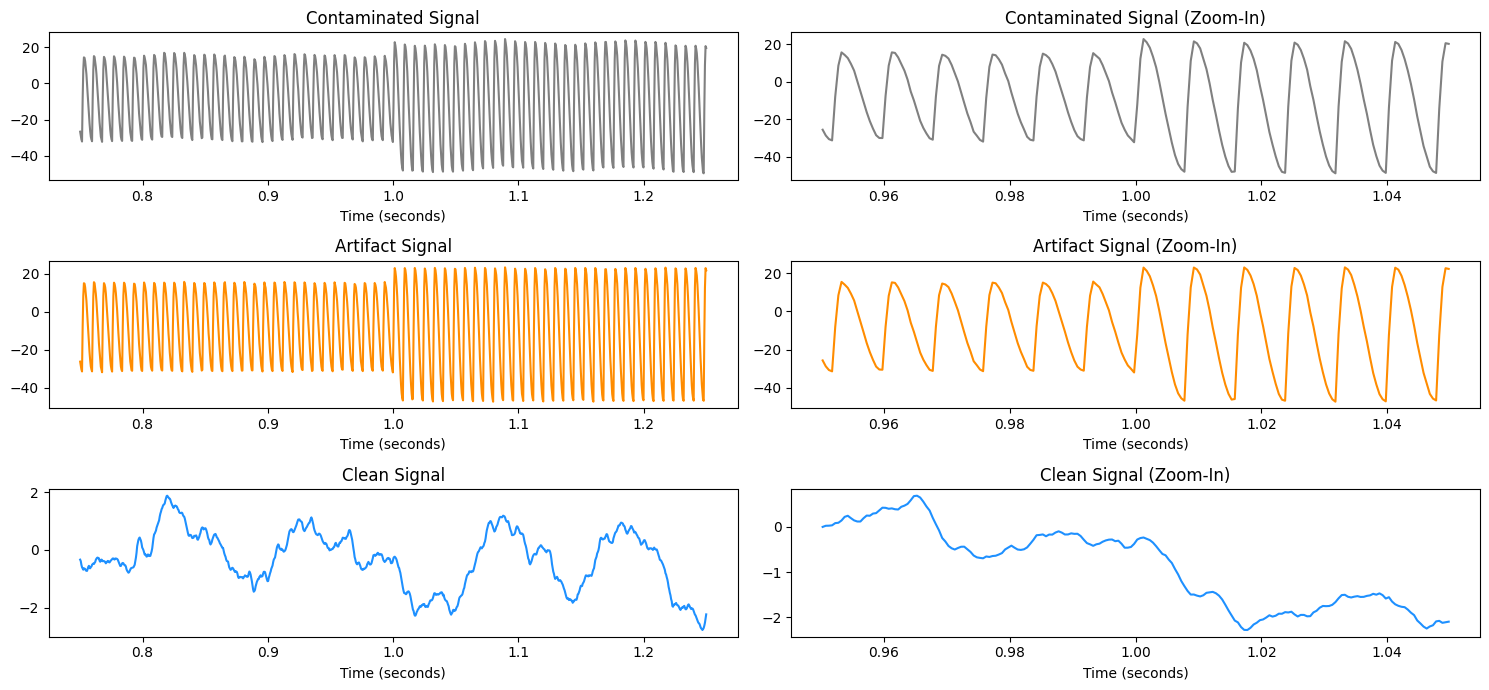

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# fpath = "C:/Users/stell/UGRP_Github_desktop/UGRP/individual_workspace/CHJ/"

import sys
sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)

from DataPlot import Data_Load_Plot, Result_Plot, Loss_Plot
from Scaling import time_scaling, time_inv_scaling

# 데이터 load & plot
datapath="C:/Users/stell/OneDrive/바탕 화면/10000_data/"

Contaminated_data, Clean_data, Artifact_data = Data_Load_Plot(datapath)

In [1]:
import h5py
import numpy as np

# MATLAB v7.3 파일 로드
mat_file_path = "C:/Users/stell/OneDrive/바탕 화면/PD_OpenLoop_ch12-13.mat" # MATLAB 파일 경로
array_data = []

with h5py.File(mat_file_path, 'r') as mat_file:
    # 데이터를 배열 형식으로 저장
    for key in mat_file.keys():
        array_data.append(np.array(mat_file[key]))

# # NumPy 배열 저장
# numpy_file_path = 'PD_OpenLoop_array_data.npy'  # 저장할 파일 경로
# np.save(numpy_file_path, array_data)

# print(f"Converted data saved to: {numpy_file_path}")

print(array_data.shape)

ModuleNotFoundError: No module named 'h5py'

In [4]:
# before_data = np.load("multichannel_signal" + ".npy")
# during_data = np.load("contaminated_by_realistic_correlatied" + ".npy")

n_channels, n_samples = Contaminated_data.shape

median_data = np.median(Contaminated_data, axis=0) # len; 4000

filtered_data = np.zeros_like(Contaminated_data)
for i in range(len(Contaminated_data)):
    filtered_data[i, :] = Contaminated_data[i, :] - median_data[:]

# print(len(median_data), during_data.shape) # 4000 (32, 4000)

# 채널 정보
stim_ch = 11
target_ch = 12

fs = 2000  # 샘플링 주파수
frequencies = np.linspace(-fs/2, fs/2, n_samples)  # 주파수 범위 설정
time = np.arange(n_samples) / fs # 시간 범위 설정

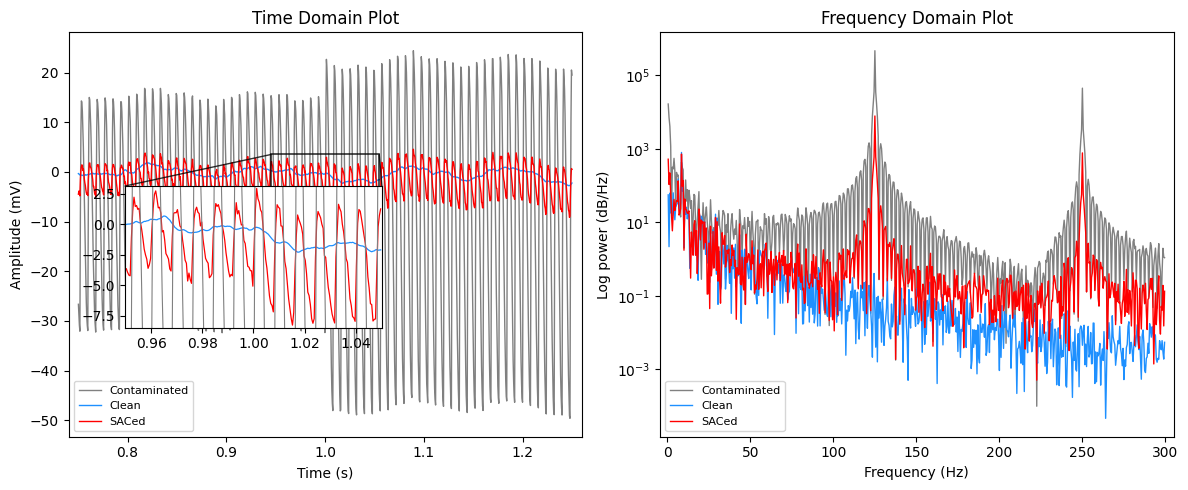

< MSE >
Time Domain MSE: 3.733078776411181 ± 6.112406810546684
Frequency Domain MSE: 158449.74716747922 ± 828228.5986461227
Time + Frequency MSE: 1027.813156911176 ± 3827.9021029606465


In [10]:
save_path = '../../result/data_10000/existing_SAC/CMR/'
save_title = 'CMR'

Result_Plot(Contaminated_data, filtered_data, Clean_data, save_path, save_title)

In [6]:
# # 결과 출력 - 전체 채널
# plt.figure(figsize=(20, 18))
# for i in range(n_channels):
#     plt.subplot(n_channels, 1, i+1)
#     plt.plot(time, during_data[i, :], 'r', label='during_data')
#     plt.plot(time, filtered_data[i, :], 'g', label='filtered_data')
#     plt.xlim(0, 2)
#     plt.title(f'Channel {i+1}')
    
# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()

NameError: name 'during_data' is not defined

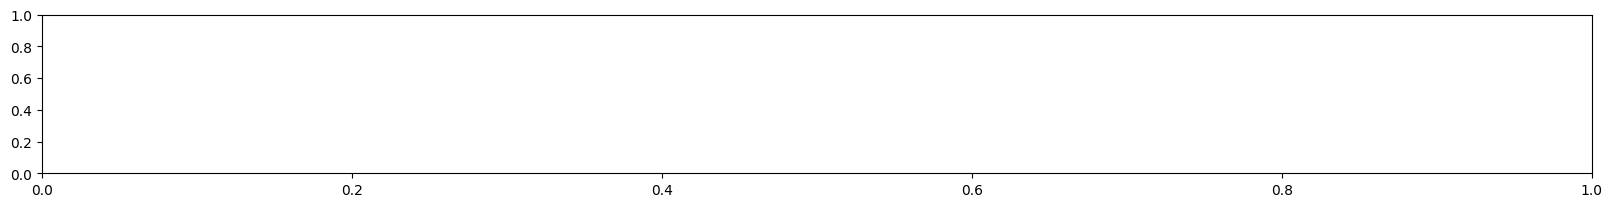

In [7]:
# 결과 플로팅 - 내가 볼 채널만
plt.figure(figsize=(20, 7))

# 원본 데이터
plt.subplot(3, 1, 1)
plt.plot(time, during_data[target_ch, :], 'r')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'During Data; Channel {target_ch}', fontsize=18)

# 필터된 데이터
plt.subplot(3, 1, 2)
plt.plot(time, filtered_data[target_ch, :], 'g')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Filtered Data; Channel {target_ch}', fontsize=18)

# Time domain
plt.subplot(3, 1, 3)
plt.plot(time, before_data[target_ch, :], 'b', label='before_data')
plt.plot(time, during_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Merged; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

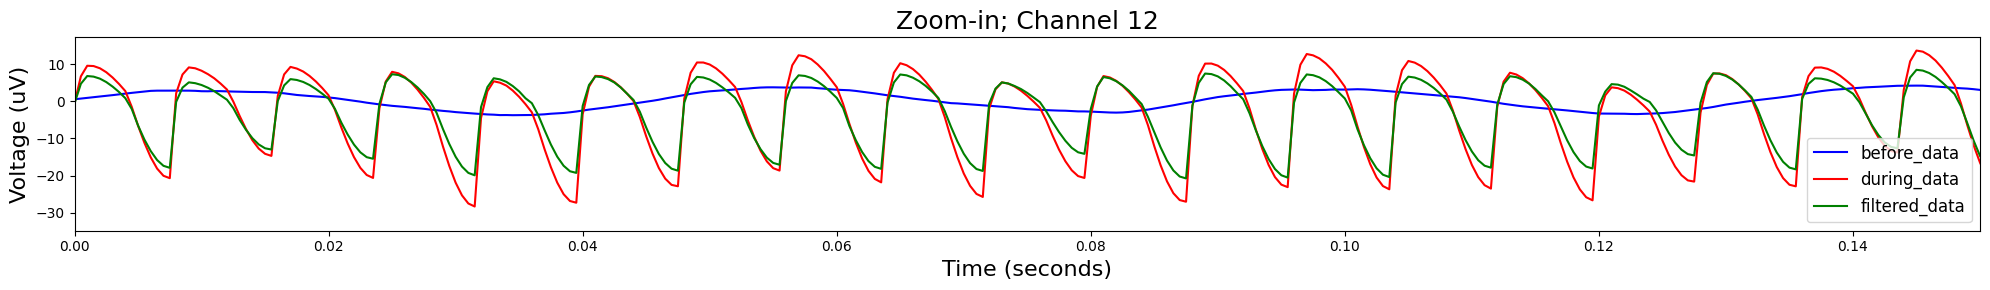

In [4]:
# 결과 플로팅 - 줌인
plt.figure(figsize=(20, 3))

start_t = 0
end_t = 0.15

plt.plot(time, before_data[target_ch, :], 'b', label='before_data')
plt.plot(time, during_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(start_t, end_t)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Zoom-in; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

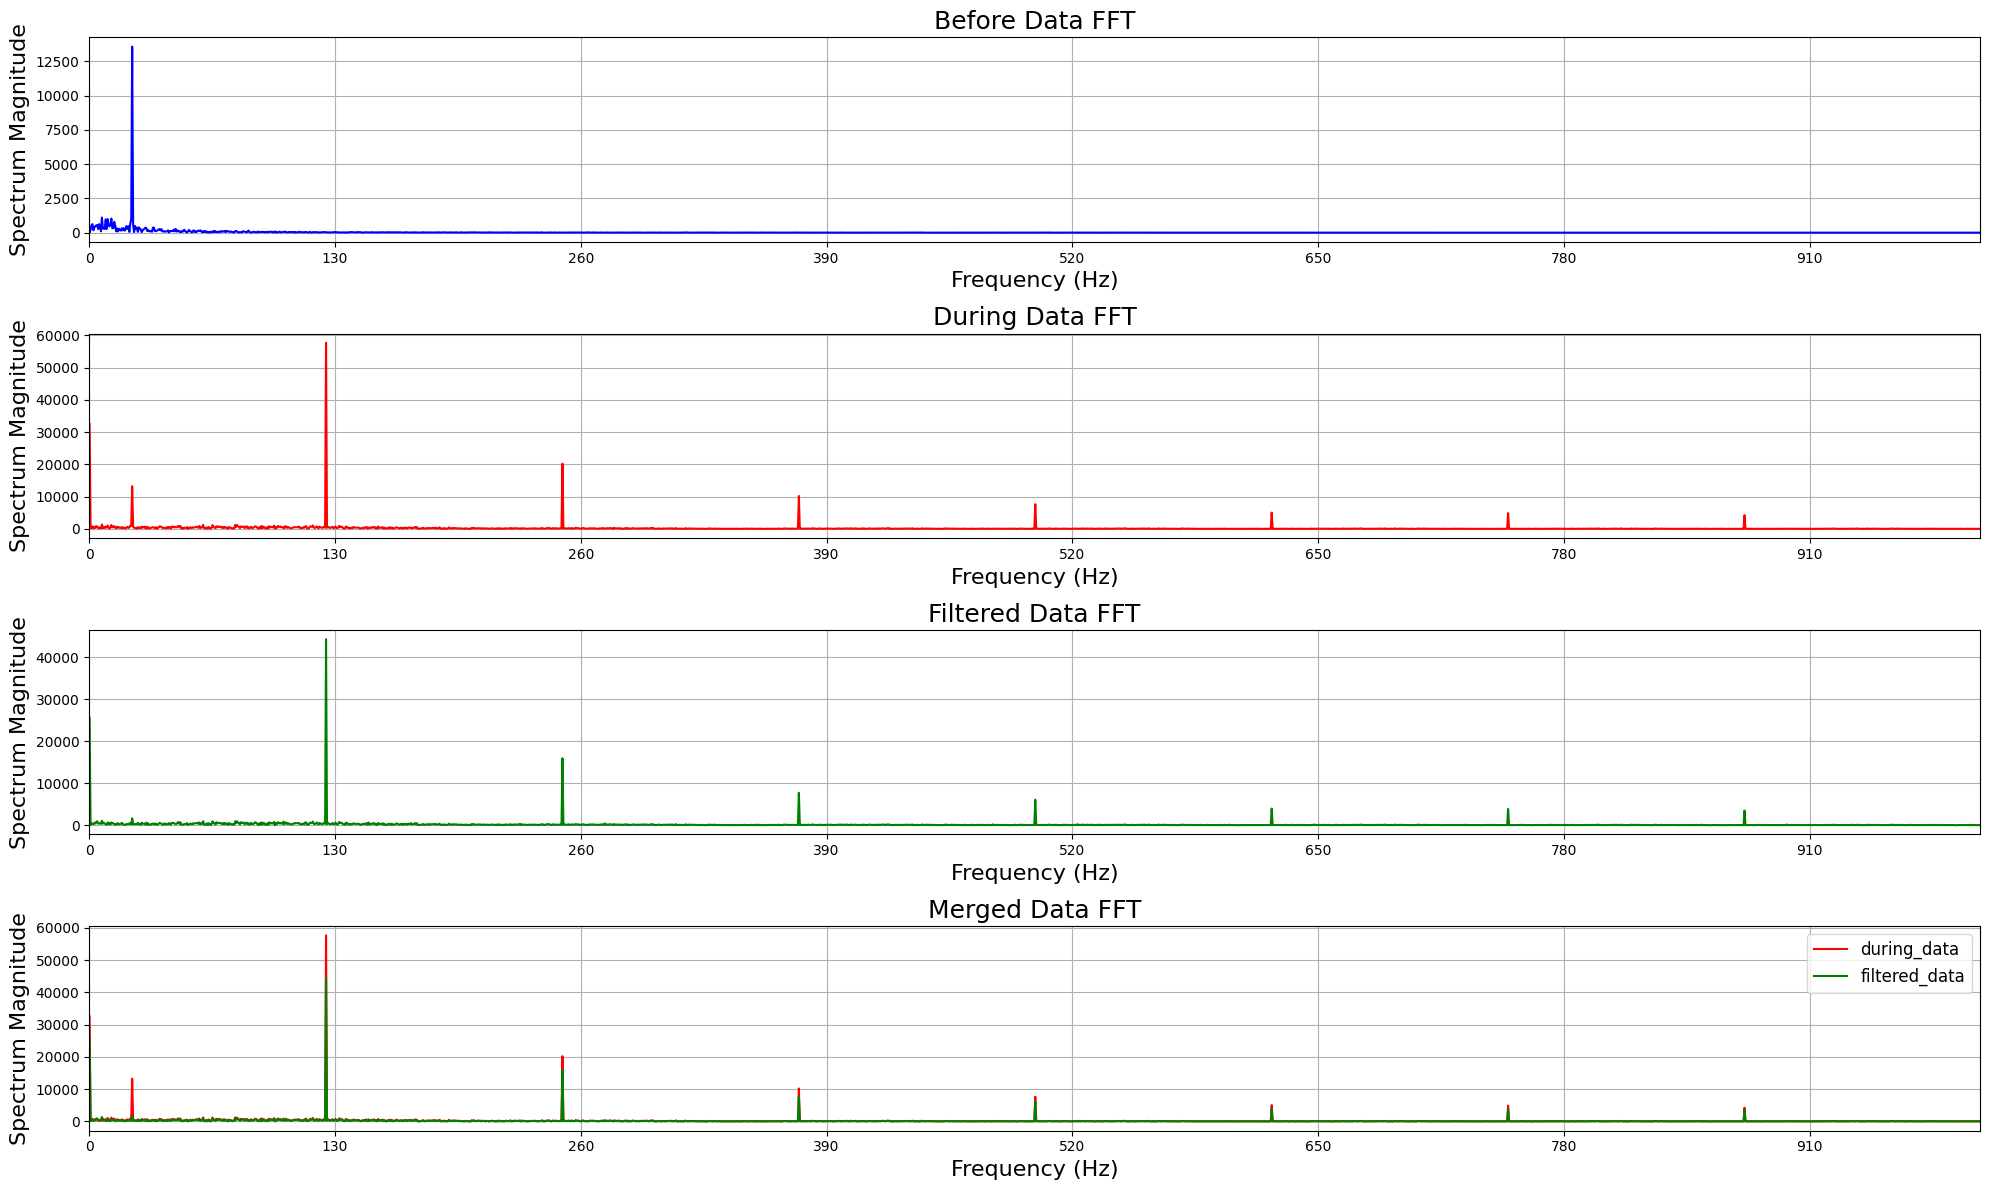

In [5]:
# 푸리에 변환 수행
before_fft_result = np.fft.fftshift(np.fft.fft(before_data, axis=1), axes=1)
during_fft_result = np.fft.fftshift(np.fft.fft(during_data, axis=1), axes=1)
filtered_fft_result = np.fft.fftshift(np.fft.fft(filtered_data, axis=1), axes=1)

# 양수 부분의 주파수와 푸리에 변환 결과 가져오기
positive_frequencies = frequencies[n_samples//2:]
positive_before_fft_result = 2 * before_fft_result[:, n_samples//2:]
positive_during_fft_result = 2 * during_fft_result[:, n_samples//2:]
positive_filtered_fft_result = 2 * filtered_fft_result[:, n_samples//2:]

# 푸리에 스펙트럼 플로팅
plt.figure(figsize=(20, 12))

# 자극 전 데이터
plt.subplot(4, 1, 1)
plt.plot(positive_frequencies, np.abs(positive_before_fft_result[target_ch, :]), 'b', label='before_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('Before Data FFT', fontsize=18)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

# 원본 데이터
plt.subplot(4, 1, 2)
plt.plot(positive_frequencies, np.abs(positive_during_fft_result[target_ch, :]), 'r', label='during_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('During Data FFT', fontsize=18)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

# 필터된 데이터
plt.subplot(4, 1, 3)
plt.plot(positive_frequencies, np.abs(positive_filtered_fft_result[target_ch, :]), 'g', label='filtered_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('Filtered Data FFT', fontsize=18)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

# Freq. domain
plt.subplot(4, 1, 4)
plt.plot(positive_frequencies, np.abs(positive_during_fft_result[target_ch, :]), 'r', label='during_data')
plt.plot(positive_frequencies, np.abs(positive_filtered_fft_result[target_ch, :]), 'g', label='filtered_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('Merged Data FFT', fontsize=18)
plt.legend(fontsize=12)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

plt.tight_layout()
plt.show()

In [6]:
# 평가
print("Time domain")
mae_time = mean_absolute_error(during_data[target_ch, :], filtered_data[target_ch, :])
mse_time = mean_squared_error(during_data[target_ch, :], filtered_data[target_ch, :])
print(f"Mean Absolute Error: {mae_time:.4f}")
print(f"Mean Squared Error: {mse_time:.4f}")

print("\nFrequency domain")

dft_magnitude_during = np.abs(positive_during_fft_result)**2
dft_magnitude_filtered = np.abs(positive_filtered_fft_result)**2

# 로그 변환: 0 값 처리
dft_magnitude_during[dft_magnitude_during <= 0] = np.finfo(float).eps
dft_magnitude_filtered[dft_magnitude_filtered <= 0] = np.finfo(float).eps

log_dft_magnitude_during = np.log10(dft_magnitude_during)
log_dft_magnitude_filtered = np.log10(dft_magnitude_filtered)

mae_freq = mean_absolute_error(log_dft_magnitude_during, log_dft_magnitude_filtered)
mse_freq = mean_squared_error(log_dft_magnitude_during, log_dft_magnitude_filtered)

print(f"Mean Absolute Error: {mae_freq:.4f}")
print(f"Mean Squared Error: {mse_freq:.4f}")

Time domain
Mean Absolute Error: 2.7559
Mean Squared Error: 12.0557

Frequency domain
Mean Absolute Error: 0.8297
Mean Squared Error: 1.2534
